In [1]:
script = False

import numpy as np
import pandas as pd
import os.path

from PIL import Image, ImageOps
from astropy.io import fits
from astropy.visualization import make_lupton_rgb
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
def make_plot_all(objects, data):
    for i in range(len(objects)):
        if(i==200): break
        if(i%4 == 0):
            plt.figure(figsize=(12,8))
            for j in range(4):
                if(i+j > len(objects)-1): break
                plt.subplot(1,4,j+1)
                print(data['COADD_OBJECT_ID'].iloc[i+j])
                tmp_title = '{:.3f}'.format(data['Prob'].iloc[i+j])
                plt.title(tmp_title)
                rgb = make_lupton_rgb(objects[i+j][2], objects[i+j][1], objects[i+j][0], Q=11., stretch=40.)
                plt.imshow(rgb, aspect='equal')
                plt.xticks([], [])
                plt.yticks([], []) 
            if(script):
                plt.savefig(title+'_'+str(i+j), bbox_inches='tight')
                plt.close()
            else: 
                plt.show()

In [3]:
def explore(filename, prob_lim, endname):
    path = '/Users/jimenagonzalez/research/DSPL/Searching-double-lenses/vit_cnn_multiclass/'
    file_path = path + filename
    hdu_list = fits.open(file_path)
    images = hdu_list[1].data
    data = pd.DataFrame(hdu_list[2].data)
    data = data.astype({'COADD_OBJECT_ID': int, 'Prob': float})
    hdu_list.close()
    
    data = data[data['Prob'] > prob_lim]
    images = images[data.index.tolist()]
    #print(len(data))
    make_plot_all(images, data)

Positives
1033361449


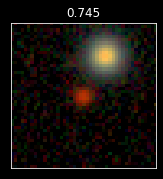

1032345976


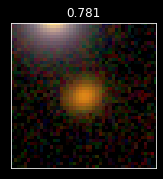

1033610157


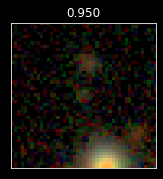

1032880900


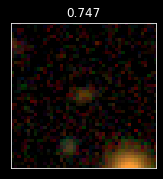

1033525951


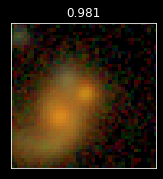

1034263746


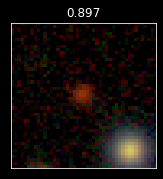

1034352444


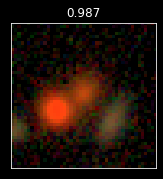

1032556992


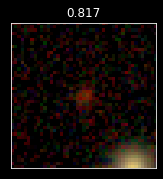

1034723192


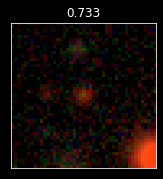

1035607366


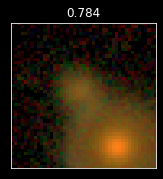

1035277625


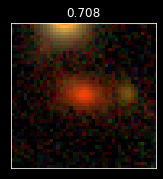

1035803832


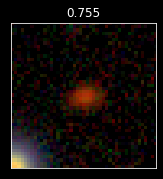

Rings
1031851789


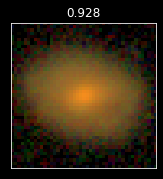

1033046087


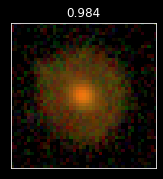

1032373324


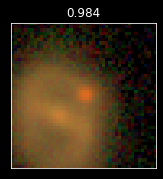

1032169460


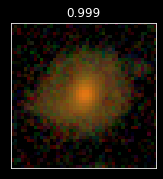

1033660643


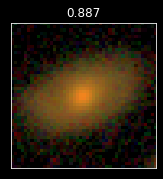

1034178921


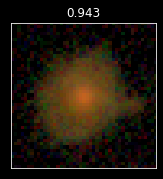

1032329307


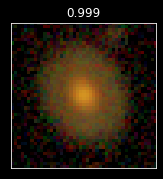

1031827589


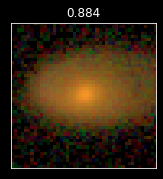

1032900009


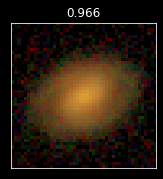

1033533714


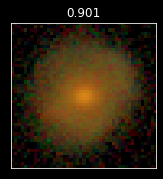

1034270752


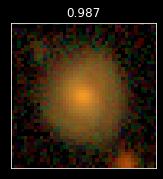

1034411987


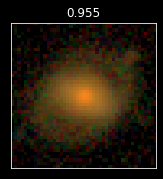

1034649797


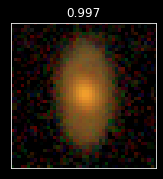

1034825815


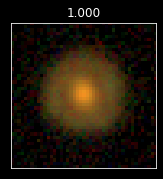

1034939215


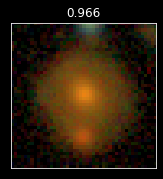

1033421835


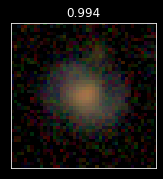

1034352729


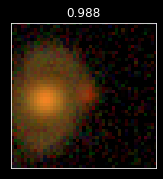

1032556176


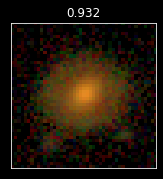

1034707709


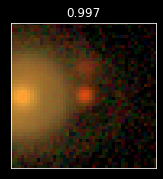

1035607900


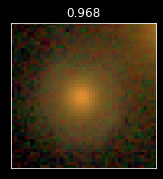

1035692504


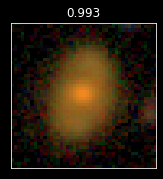

1035514797


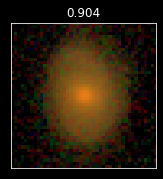

1035830633


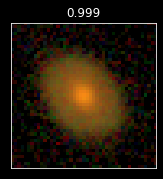

1035901138


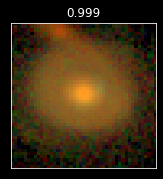

Smooth
1031884541


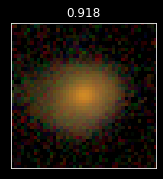

1033039017


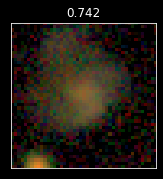

Companion
1031879236


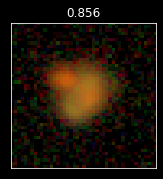

1033043611


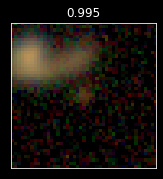

1032368263


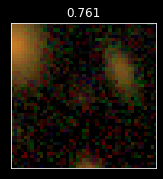

1032194664


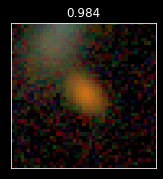

1033631236


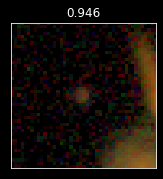

1032128090


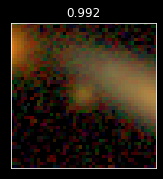

1032315579


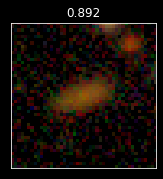

1031810946


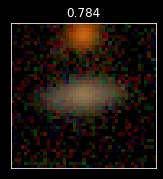

1032849875


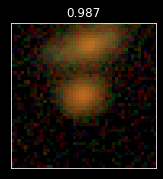

1033570341


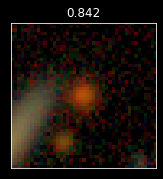

1034296501


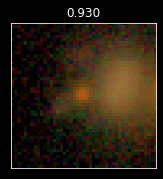

1034412322


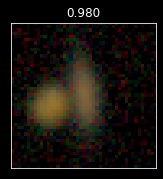

1034635463


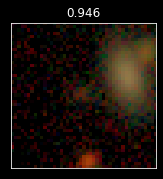

1034839895


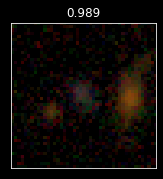

1034933042


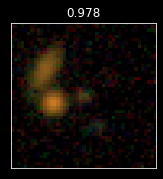

1033402454


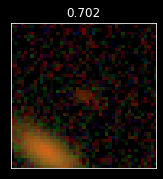

1034331178


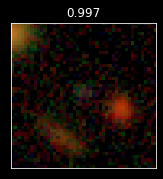

1032564728


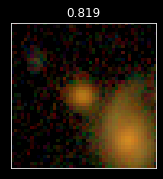

1034694253


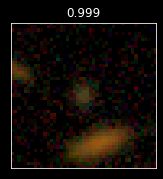

1034790841


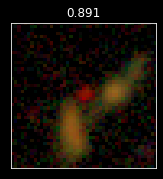

1035676000


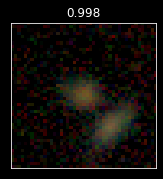

1035303866


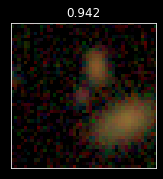

1035910876


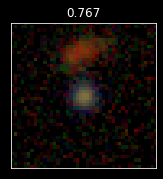

SDSS
1031856463


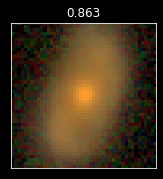

1033361554


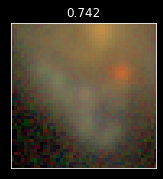

1032299390


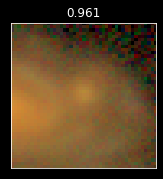

1034340694


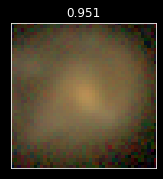

1034691525


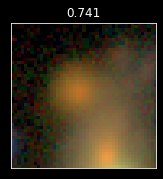

1035654751


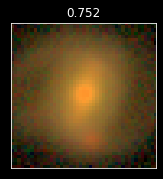

1035524174


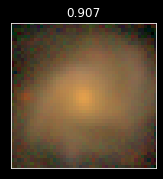

1035308294


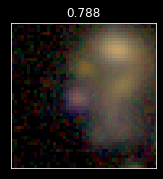

1035822777


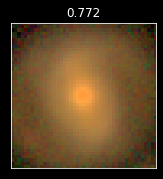

1035928879


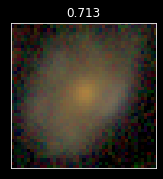

DES_spirals
1033359158


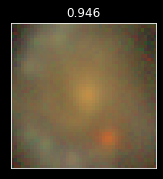

1032353314


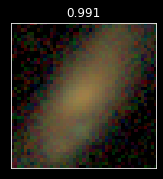

1032024013


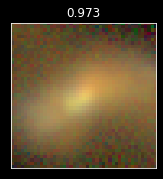

1033653100


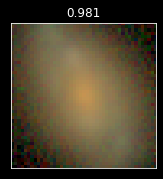

1034183203


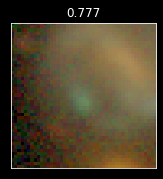

1032318158


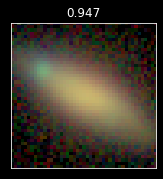

1031815557


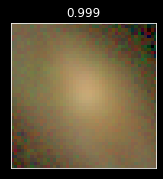

1032847561


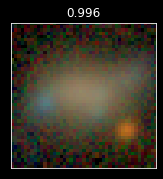

1034304705


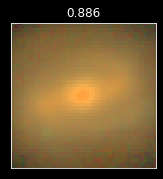

1034438947


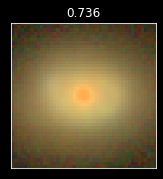

1034613011


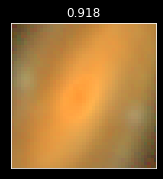

1034832300


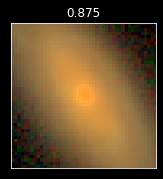

1033423377


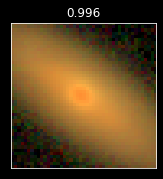

1034537494


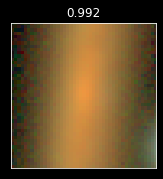

1034360821


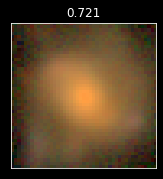

1034696745


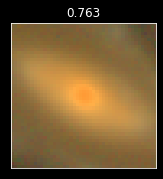

1034241127


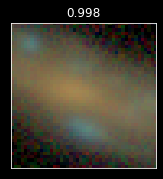

1035662724


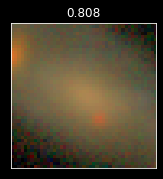

1035502293


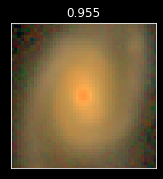

1035140423


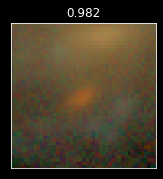

1035822167


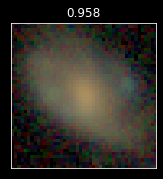

1035916680


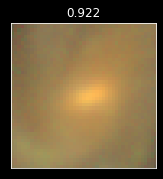

Crowded
1031888809


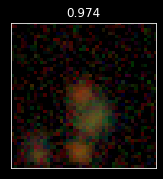

1033063257


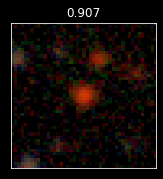

1032366779


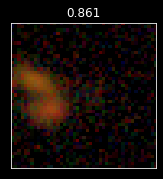

1034208079


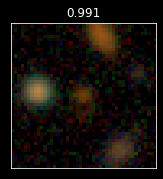

1032307734


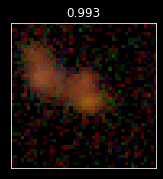

1031809898


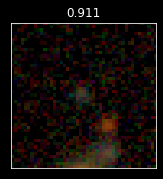

1033529703


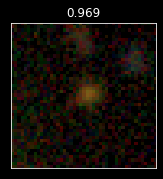

1034261952


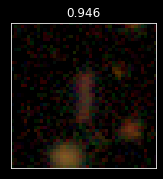

1034441822


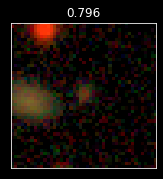

1034619897


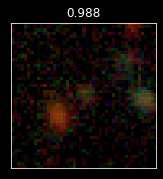

1034865778


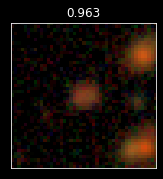

1034959319


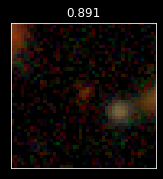

1034552266


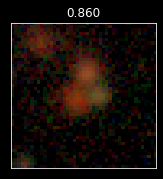

1034517757


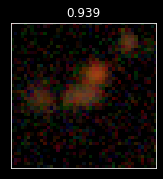

1032420332


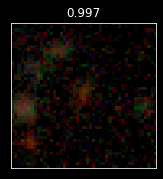

1034686435


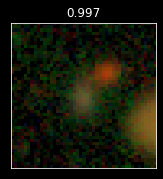

1034792400


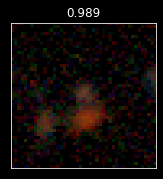

1035650809


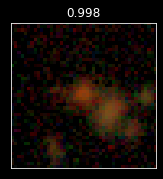

1035675319


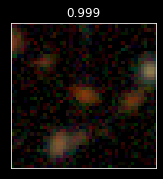

1035522543


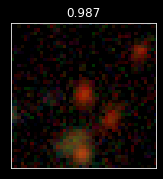

1035315896


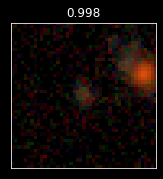

1035817689


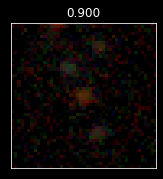

Errors
1033596731


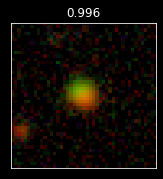

Most_negatives
1031865131


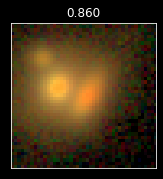

In [4]:
categories = ['Positives', 'Rings', 'Smooth', 'Companion', 'SDSS', 'DES_spirals', 'Crowded', 'Errors', 'Most_negatives']
data = pd.read_csv('tiles_pd.csv')

for i in range(len(categories)):
    #if(categories[i] == 'Most_negatives'): continue
    print(categories[i])
    for index, row in data.iterrows():
        if(index == 2 and (categories[i] == 'Smooth')): break
        if(index == 1 and (categories[i] == 'Errors' or categories[i] == 'Most_negatives')): break
        name = row['tile']
        prob_lim = 0.7
        filename = 'Y6_detections/' + name[:-5] + '_' + categories[i] + '.fits'
        if(not os.path.isfile(filename)):
            continue
        #print(name)
        explore(filename, prob_lim, categories[i])